# DSCI552 HW7

by Kartik Balodi  
Github Username: kartikbalodi  
USC ID: 5317465471

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import hamming_loss
from sklearn import svm
from imblearn.over_sampling import SMOTE 

import warnings

**(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.**  
  
Note: from the readme.txt, we learn that 
- the predictors are related to acoustic features made by the anuran species of frogs, and the study aims to use this data for anuran species recognition through their calls,
- all the predictor variables (called MFCCs_i for i ∈ {1,2,...,22} have been normalized to a range between [-1,1], &
- RecordID appears to be a redundant column/attribute towards the goal of predicting the correct family, genus and species.

In [2]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [3]:
df = df.drop('RecordID',axis=1) #since RecordID was identified as redundant to our analysis from the readme.txt of input data

X = df.drop(['Family','Genus','Species'],axis=1)
y = df[['Family','Genus','Species']]

#used as our seed for the analysis of qn1, putting it here for reproducibility of results (if needed)
randIntq1 = np.random.randint(low=1, high=2**31-1) 
randIntq1

1660033523

In [4]:
#note the results will vary upon each run of the notebook, because the data is split from a random seed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=randIntq1)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_train_standardized = pd.DataFrame(data=X_train_standardized, columns=X_train.columns)
X_test_standardized = scaler.fit_transform(X_test)
X_test_standardized = pd.DataFrame(data=X_test_standardized, columns=X_test.columns)

**(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:**
- **i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.**  
  
Resources consulted:
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score
- https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics
- https://www.linkedin.com/pulse/hamming-score-multi-label-classification-chandra-sharat/

In simple terms, the
- exact match ratio is the number of data points that have the same predicted labels to true labels for every label of that points divided by the total number of data points tested.
- hamming score is the classification metric featuring a fraction of the predictions that a model got right
- hamming loss is the fraction of the wrong labels to the total number of labels, equivalent to 1 - hamming score.  
  
In more detailed/formula-based terms, this means:
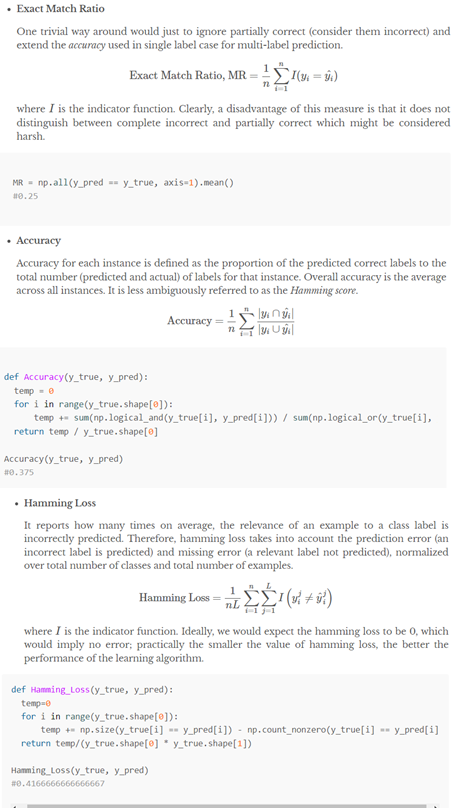
  
Copied from: https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

**ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.  
(How to choose parameter ranges for SVMs? One can use wide ranges for the parameters and a fine grid (e.g. 1000 points) for cross validation; however,this method may be computationally expensive. An alternative way is to train the SVM with very large and very small parameters on the whole training data and find very large and very small parameters for which the training accuracy is not below a threshold (e.g., 70%). Then one can select a fixed number of parameters (e.g., 20) between those points for cross validation. For the penalty parameter, usually one has to consider increments in log(λ). For example, if one found that the accuracy of a support vector machine will not be below 70% for λ = 10−3 and λ = 106 , one has to choose log(λ) ∈ {−3, −2, . . . , 4, 5, 6}. For the Gaussian Kernel parameter, one usually chooses linear increments, e.g. σ ∈ {.1, .2, . . . , 2}. When both σ and λ are to be chosen using cross-validation, combinations of very small and very large λ’s and σ’s that keep the accuracy above a threshold (e.g.70%) can be used to determine the ranges for σ and λ. Please note that these are very rough rules of thumb, not general procedures.)**  
  
**You are welcome to try to solve the problem with both standardized (It seems that the data are already normalized) and raw attributes and report the results.**  
  
Resources consulted:
- https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b
- https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel
- https://datascience.stackexchange.com/questions/4943/intuition-for-the-regularization-parameter-in-svm
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- https://medium.com/@kushaldps1996/a-complete-guide-to-support-vector-machines-svms-501e71aec19e
- https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd

In [5]:
regularization_penalty = [10 ** i for i in range(-3,6)]
gaussian_kernel_coeff = np.arange(0.1,2.01,0.1)
class_names = [['Family'],['Genus'],['Species']]
skv = StratifiedKFold(n_splits=10)

regularization_penalty_range = []
gaussian_kernel_coeff_range = []
for C in regularization_penalty:
    for gamma in gaussian_kernel_coeff:
        regularization_penalty_range.append(C)
        gaussian_kernel_coeff_range.append(gamma)

In [6]:
#without standardized data

class_df_list = []
for class_name in class_names:
    y_train_name = y_train[class_name]
    
    hamming_loss_range = []
    for C in regularization_penalty:
        for gamma in gaussian_kernel_coeff:
            
            hamming_loss_ksplits = []
            for train_index, test_index in skv.split(X_train, y_train_name):
                
                X_train_cv, X_test_cv = X_train.iloc[train_index.tolist(),:], X_train.iloc[test_index.tolist(),:]
                y_train_cv, y_test_cv = y_train_name.iloc[train_index.tolist()], y_train_name.iloc[test_index.tolist()]

                clf = svm.SVC(kernel="rbf", C=C, gamma=gamma, decision_function_shape='ovr').fit(
                    X_train_cv, y_train_cv[class_name].values.flatten())
                
                y_pred = clf.predict(X_test_cv)
                hamming_loss_ksplits.append(hamming_loss(y_test_cv, y_pred))
            
            hamming_loss_range.append(np.mean(hamming_loss_ksplits))
        
    df_class = pd.DataFrame({'C':regularization_penalty_range, 
                             'Gamma':gaussian_kernel_coeff_range, 
                             'Hamming Loss':hamming_loss_range})
    df_class = df_class.sort_values(by='Hamming Loss')
    print(class_name)
    display(df_class.head(1))
    class_df_list.append(df_class)

['Family']


,C,Gamma,Hamming Loss
178,100000.0,1.9,0.007547


['Genus']


,C,Gamma,Hamming Loss
112,100.0,1.3,0.010725


['Species']


,C,Gamma,Hamming Loss
91,10.0,1.2,0.010129


In [7]:
def test_set_predictions(train_X, test_X, class_name, C, gamma):
    
    print(class_name)
    print('C:',str(C))
    print('gamma:',str(gamma))
    
    clf = svm.SVC(kernel="rbf", C=C, gamma=gamma, decision_function_shape='ovr').fit(
        train_X,y_train[class_name].values.flatten())
    y_pred = clf.predict(test_X)
    
    #omitted exact_match because it's the same as hamming loss/score for single-class labelling in one vs all classification
    print('Hamming loss:', str(hamming_loss(y_test[class_name], y_pred)))
    print('Hamming score:', str(1 - hamming_loss(y_test[class_name], y_pred)))
    
    return y_pred

In [8]:
#Species-specific metrics
print('Species-specific metrics')

results_list = []
for index, class_df in enumerate(class_df_list):
    
    class_name = class_names[index]
    C = class_df.iat[0,0]
    gamma = class_df.iat[0,1]
    
    class_pred = test_set_predictions(X_train_standardized, X_test_standardized, class_name, C, gamma)
    results_list.append(class_pred)

Species-specific metrics
['Family']
C: 100000.0
gamma: 1.9000000000000001
Hamming loss: 0.19129226493747106
Hamming score: 0.8087077350625289
['Genus']
C: 100.0
gamma: 1.3000000000000003
Hamming loss: 0.1667438628994905
Hamming score: 0.8332561371005095
['Species']
C: 10.0
gamma: 1.2000000000000002
Hamming loss: 0.18805002315886984
Hamming score: 0.8119499768411301


In [9]:
#Overall metrics
print("Overall metrics")

y_pred = np.array(results_list)
y_pred = y_pred.T

em_score = np.all(y_pred == y_test.to_numpy(), axis=1).mean()
hamming_score = ( (y_test.to_numpy().flatten() == y_pred.flatten()).sum() ) / y_pred.flatten().size

print("Exact Match Score:", str(em_score))
print("Hamming Score:", str(hamming_score))

Overall metrics
Exact Match Score: 0.7568318666049096
Hamming Score: 0.8179712830013895


In [10]:
#with standardized data

class_df_list = []
for class_name in class_names:
    y_train_name = y_train[class_name]
    
    hamming_loss_range = []
    for C in regularization_penalty:
        for gamma in gaussian_kernel_coeff:
            
            hamming_loss_ksplits = []
            for train_index, test_index in skv.split(X_train_standardized, y_train_name):
                
                X_train_cv, X_test_cv = X_train_standardized.iloc[train_index.tolist(),:], X_train_standardized.iloc[test_index.tolist(),:]
                y_train_cv, y_test_cv = y_train_name.iloc[train_index.tolist()], y_train_name.iloc[test_index.tolist()]

                clf = svm.SVC(kernel="rbf", C=C, gamma=gamma, decision_function_shape='ovr').fit(
                    X_train_cv, y_train_cv[class_name].values.flatten())
                
                y_pred = clf.predict(X_test_cv)
                hamming_loss_ksplits.append(hamming_loss(y_test_cv, y_pred))
            
            hamming_loss_range.append(np.mean(hamming_loss_ksplits))
        
    df_class = pd.DataFrame({'C':regularization_penalty_range, 
                             'Gamma':gaussian_kernel_coeff_range, 
                             'Hamming Loss':hamming_loss_range})
    df_class = df_class.sort_values(by='Hamming Loss')
    print(class_name)
    display(df_class.head(1))
    class_df_list.append(df_class)

['Family']


,C,Gamma,Hamming Loss
100,100.0,0.1,0.010526


['Genus']


,C,Gamma,Hamming Loss
120,1000.0,0.1,0.015094


['Species']


,C,Gamma,Hamming Loss
100,100.0,0.1,0.016681


In [11]:
#Species-specific metrics
print('Species-specific metrics')

results_list = []
for index, class_df in enumerate(class_df_list):
    
    class_name = class_names[index]
    C = class_df.iat[0,0]
    gamma = class_df.iat[0,1]
    
    class_pred = test_set_predictions(X_train_standardized, X_test_standardized, class_name, C, gamma)
    results_list.append(class_pred)

Species-specific metrics
['Family']
C: 100.0
gamma: 0.1
Hamming loss: 0.010653080129689671
Hamming score: 0.9893469198703103
['Genus']
C: 1000.0
gamma: 0.1
Hamming loss: 0.0111162575266327
Hamming score: 0.9888837424733673
['Species']
C: 100.0
gamma: 0.1
Hamming loss: 0.015748031496062992
Hamming score: 0.984251968503937


In [12]:
#Overall metrics
print("Overall metrics")

y_pred = np.array(results_list)
y_pred = y_pred.T

em_score = np.all(y_pred == y_test.to_numpy(), axis=1).mean()
hamming_score = ( (y_test.to_numpy().flatten() == y_pred.flatten()).sum() ) / y_pred.flatten().size

print("Exact Match Score:", str(em_score))
print("Hamming Score:", str(hamming_score))

Overall metrics
Exact Match Score: 0.9810097267253358
Hamming Score: 0.9874942102825383


**iii. Repeat 1(b)ii with L1-penalized SVMs (The convention is to use L1 penalty with linear kernel). Remember to standardize (It seems that the data are already normalized) the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.**  
  
Resources consulted:
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- https://www.csie.ntu.edu.tw/~cjlin/liblinear/  
  
I know in class Prof. Rajati mentioned recommending using liblinear for this bit, but I had issues with installing for some reason - and ended up using SkLearn's LinearSVC instead.

In [13]:
regularization_penalty = [10 ** i for i in range(-3,6)]
class_names = [['Family'],['Genus'],['Species']]
skv = StratifiedKFold(n_splits=10)

regularization_penalty_range = []
for C in regularization_penalty:
    regularization_penalty_range.append(C)

In [14]:
#with standardized data
warnings.filterwarnings('ignore')

class_df_list = []
for class_name in class_names:
    y_train_name = y_train[class_name]
    
    hamming_loss_range = []
    for C in regularization_penalty:

        hamming_loss_ksplits = []
        for train_index, test_index in skv.split(X_train_standardized, y_train_name):

            X_train_cv, X_test_cv = X_train_standardized.iloc[train_index.tolist(),:], X_train_standardized.iloc[test_index.tolist(),:]
            y_train_cv, y_test_cv = y_train_name.iloc[train_index.tolist()], y_train_name.iloc[test_index.tolist()]

            clf = svm.LinearSVC(penalty="l1", dual=False, C=C).fit(
                X_train_cv, y_train_cv[class_name].values.flatten())

            y_pred = clf.predict(X_test_cv)
            hamming_loss_ksplits.append(hamming_loss(y_test_cv, y_pred))

        hamming_loss_range.append(np.mean(hamming_loss_ksplits))
        
    df_class = pd.DataFrame({'C':regularization_penalty_range, 
                             'Hamming Loss':hamming_loss_range})
    df_class = df_class.sort_values(by='Hamming Loss')
    print(class_name)
    display(df_class.head(1))
    class_df_list.append(df_class)

['Family']


,C,Hamming Loss
5,100.0,0.061756


['Genus']


,C,Hamming Loss
5,100.0,0.050046


['Species']


,C,Hamming Loss
4,10.0,0.042501


In [15]:
def test_set_predictions_linearSVC(train_X, test_X, class_name, C):
    
    print(class_name)
    print('C:',str(C))
    
    clf = svm.LinearSVC(penalty="l1", dual=False, C=C, max_iter=10000).fit(
        train_X,y_train[class_name].values.flatten())
    y_pred = clf.predict(test_X)
    
    #omitted exact_match because it's the same as hamming loss/score for single-class labelling in one vs all classification
    print('Hamming loss:', str(hamming_loss(y_test[class_name], y_pred)))
    print('Hamming score:', str(1 - hamming_loss(y_test[class_name], y_pred)))
    
    return y_pred

In [16]:
#Species-specific metrics
print('Species-specific metrics')

results_list = []
for index, class_df in enumerate(class_df_list):
    
    class_name = class_names[index]
    C = class_df.iat[0,0]
    
    class_pred = test_set_predictions_linearSVC(X_train_standardized, X_test_standardized, class_name, C)
    results_list.append(class_pred)

Species-specific metrics
['Family']
C: 100.0
Hamming loss: 0.06855025474756832
Hamming score: 0.9314497452524317
['Genus']
C: 100.0
Hamming loss: 0.06113941639647985
Hamming score: 0.9388605836035202
['Species']
C: 10.0
Hamming loss: 0.05141269106067624
Hamming score: 0.9485873089393237


In [17]:
#Overall metrics
print("Overall metrics")

y_pred = np.array(results_list)
y_pred = y_pred.T

em_score = np.all(y_pred == y_test.to_numpy(), axis=1).mean()
hamming_score = ( (y_test.to_numpy().flatten() == y_pred.flatten()).sum() ) / y_pred.flatten().size

print("Exact Match Score:", str(em_score))
print("Hamming Score:", str(hamming_score))

Overall metrics
Exact Match Score: 0.9106067623899954
Hamming Score: 0.9396325459317585


**iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.**

We'll resample for the whole training dataset first, and then train our classifier w/ cross-validation before re-evaluating against the test set. I face the issue of not being able to resample 3 separate y-columns together, so first I encode them and cast it as a string object, then I resample with SMOTE, before breaking the labels back to their consituent individual labels.

In [18]:
class_names2 = ['Family','Genus','Species']

#label encoding store
label_encoder_array = []
encoded_y_array = []
for class_name in class_names2:
    le = LabelEncoder()
    le_y = le.fit_transform(y_train[class_name])
    label_encoder_array.append(le)
    encoded_y_array.append(le_y)

#casting each encoded label as an overall string
y_train_str = []
for i in range(len(encoded_y_array[0])):
    y_train_str.append(str(encoded_y_array[0][i])+str(encoded_y_array[1][i])+str(encoded_y_array[2][i]))

#resampling data
sm = SMOTE()
X_res, le_y_res = sm.fit_resample(X_train_standardized, y_train_str)

#splitting resampled labels from string to their consituent int form
encoded_y_array = [[],[],[]]
for i in range(len(le_y_res)):
    encoded_y_array[0].append(int(le_y_res[i][0]))
    encoded_y_array[1].append(int(le_y_res[i][1]))
    encoded_y_array[2].append(int(le_y_res[i][2]))
    
#inverting the int encoding to the respective family/genus/species names
y_res = []
for i in range(len(encoded_y_array)):
    inv = label_encoder_array[i].inverse_transform(encoded_y_array[i])
    y_res.append(inv.T)
y_res_np = np.array(y_res)

In [19]:
X_resampled = pd.DataFrame(data=X_res, columns=X_train.columns)
y_resampled = pd.DataFrame(data=y_res_np.T, columns=y_train.columns)

In [20]:
regularization_penalty = [10 ** i for i in range(-3,6)]
class_names = [['Family'],['Genus'],['Species']]
skv = StratifiedKFold(n_splits=10)

regularization_penalty_range = []
for C in regularization_penalty:
    regularization_penalty_range.append(C)

In [21]:
#with standardized data
warnings.filterwarnings('ignore')

class_df_list = []
for class_name in class_names:
    y_train_name = y_resampled[class_name]
    
    hamming_loss_range = []
    for C in regularization_penalty:

        hamming_loss_ksplits = []
        for train_index, test_index in skv.split(X_resampled, y_train_name):

            X_train_cv, X_test_cv = X_resampled.iloc[train_index.tolist(),:], X_resampled.iloc[test_index.tolist(),:]
            y_train_cv, y_test_cv = y_train_name.iloc[train_index.tolist()], y_train_name.iloc[test_index.tolist()]

            clf = svm.LinearSVC(penalty="l1", dual=False, C=C).fit(
                X_train_cv, y_train_cv[class_name].values.flatten())

            y_pred = clf.predict(X_test_cv)
            hamming_loss_ksplits.append(hamming_loss(y_test_cv, y_pred))

        hamming_loss_range.append(np.mean(hamming_loss_ksplits))
        
    df_class = pd.DataFrame({'C':regularization_penalty_range, 
                             'Hamming Loss':hamming_loss_range})
    df_class = df_class.sort_values(by='Hamming Loss')
    print(class_name)
    display(df_class.head(1))
    class_df_list.append(df_class)

['Family']


,C,Hamming Loss
4,10.0,0.114198


['Genus']


,C,Hamming Loss
3,1.0,0.059951


['Species']


,C,Hamming Loss
5,100.0,0.036643


In [22]:
def test_set_predictions_linearSVC_SMOTE(train_X, test_X, class_name, C):
    
    print(class_name)
    print('C:',str(C))
    
    clf = svm.LinearSVC(penalty="l1", dual=False, C=C, max_iter=10000).fit(
        train_X,y_resampled[class_name].values.flatten())
    y_pred = clf.predict(test_X)
    
    #omitted exact_match because it's the same as hamming loss/score for single-class labelling in one vs all classification
    print('Hamming loss:', str(hamming_loss(y_test[class_name], y_pred)))
    print('Hamming score:', str(1 - hamming_loss(y_test[class_name], y_pred)))
    
    return y_pred

In [23]:
#Species-specific metrics
print('Species-specific metrics')

results_list = []
for index, class_df in enumerate(class_df_list):
    
    class_name = class_names[index]
    C = class_df.iat[0,0]
    
    class_pred = test_set_predictions_linearSVC_SMOTE(X_resampled, X_test_standardized, class_name, C)
    results_list.append(class_pred)

Species-specific metrics
['Family']
C: 10.0
Hamming loss: 0.06438165817508106
Hamming score: 0.935618341824919
['Genus']
C: 1.0
Hamming loss: 0.05650764242704956
Hamming score: 0.9434923575729505
['Species']
C: 100.0
Hamming loss: 0.04585456229735989
Hamming score: 0.9541454377026402


In [24]:
#Overall metrics
print("Overall metrics")

y_pred = np.array(results_list)
y_pred = y_pred.T

em_score = np.all(y_pred == y_test.to_numpy(), axis=1).mean()
hamming_score = ( (y_test.to_numpy().flatten() == y_pred.flatten()).sum() ) / y_pred.flatten().size

print("Exact Match Score:", str(em_score))
print("Hamming Score:", str(hamming_score))

Overall metrics
Exact Match Score: 0.9073645206113942
Hamming Score: 0.9444187123668365


Note: the analysis can change for upon repeating because of different random seed/differently picked results for cross-validation. Random seed used in results for this markdown analysis: randIntq1 = 1660033523. Overall performance summary:  

SVM with Gaussian Kernel
- Exact Match Score: 0.7568318666049096
- Hamming Score: 0.8179712830013895  

L1-penalized SVM (with Standardized Data)
- Exact Match Score: 0.9106067623899954
- Hamming Score: 0.9396325459317585  

L1-penalized SVM with SMOTE (with Standardized Data)
- Exact Match Score: 0.9073645206113942
- Hamming Score: 0.9444187123668365  

SVM with Gaussian Kernel (with Standardized Data)
- Exact Match Score: 0.9810097267253358
- Hamming Score: 0.9874942102825383  
  
We observe that SVM with Gaussian Kernel without standardizing data does poor with 81.8% hamming score and 75.7% exact matching. This is improved by using L1-penalized SVM (with Standardized Data). I would argue that based on these results, SMOTE marginally improves the performance of L1-penalized SVM because the hamming score increases by ~0.5%. While the exact match for SMOTE is slightly less compared to L1-penalized SVM without SMOTE, this is means that the misclassified labels were spread out across more unique data points - but the point stands that the total labels misclassified here is slightly lesser with SMOTE. Note that rerunning the notebook gives L1-penalized SVM with/without SMOTE around the same performance, thus the performance of L1-penalized SVM is similar to repeating the process after balancing the dataset by performing SMOTE.  
  
We find that the SVM with Gaussian Kernel performs the best of the four options, after we have standardized the data. The performance improvements are extremely significant here, with around 8% improvement on exact match and 5% on hamming score when compared to both variants of the L1-penalized SVM. The common factor among these SVM implementation is the use of _standardized data_. I believe that in the context of this problem, standardizing data is the biggest factor influencing improved performance of the SVM model. While the input data is normalized prior to our use, standardizing it further in this case seems to give more insights about the spread of the data, which is probably better captured by SVM.  
  
I found some links that seemed insightful towards the benefits of normalizing/standardizing data, which I'm keeping here for future reference:
- https://stats.stackexchange.com/questions/65094/why-scaling-is-important-for-the-linear-svm-classification
- https://towardsdatascience.com/effect-of-feature-standardization-on-linear-support-vector-machines-13213765b812
- https://www.baeldung.com/cs/svm-feature-scaling
- https://builtin.com/data-science/when-and-why-standardize-your-data

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
### Monte-Carlo Simulation: 

In [25]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

**Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.**  
  
**(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods
provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.**  
  
**(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.**  
  
**(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss (Research what these scores are. For example, see the paper A Literature Survey on Algorithms for Multi-label Learning, by Mohammad Sorower.) between the true labels and the labels assigned by clusters.**  
  
Resources consulted:
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [26]:
best_silhouette_score_MCrun_list = []
best_k_cluster_MCrun_list = []

ave_hamming_distance_MCrun_list = []
ave_hamming_score_MCrun_list = []
ave_hamming_loss_MCrun_list = []

for i in range(50):
    #Note the use of the SAME random generator seed of randIntq2 for each individual MCrun
    #I don't change my random_state here because I want to compare the performance the different clusters for the same
    #Monte-Carlo run, in order to be consistent across different clusters during centroid initialization
    randIntq2 = np.random.randint(low=1, high=2**31-1) 
    
    #2a
    best_silhouette = float('-inf')
    best_k_cluster = 0
    for k_cluster in range(2,51,1): #note: k=1 is just the dataset & is ignored/returns error when performing KMeans clustering
        
        clusterer = KMeans(n_clusters=k_cluster, random_state=randIntq2)
        cluster_labels = clusterer.fit_predict(X)
        
        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg>0 and silhouette_avg>best_silhouette:
            best_silhouette = silhouette_avg
            best_k_cluster = k_cluster
    
    best_silhouette_score_MCrun_list.append(best_silhouette)
    best_k_cluster_MCrun_list.append(best_k_cluster)
    
    best_k_clusterer = KMeans(n_clusters=best_k_cluster, random_state=randIntq2)
    fit = best_k_clusterer.fit(X)
    labels = fit.labels_
    
    #2b
    majority_class = []
    class_names2 = ['Family','Genus','Species']
    for j in range(best_k_cluster):
        
        class_name_majority_class = []
        for class_name in class_names2:
                          
            index = np.where(labels == j)
            y_labels = y[[class_name]].iloc[index]
            y_label_distribution = y_labels.value_counts()
            majority_class_name = list(y_label_distribution.index)[0][0]
            
            class_name_majority_class.append(majority_class_name)            
        majority_class.append(class_name_majority_class)
    
    #2c
    #find the cluster labelling and compare that to true labelling using hamming distance/loss/score as metrics
    interpretive_labels = []
    for j in range(len(labels)):
        interpretive_labels.append(majority_class[labels[j]])
    
    ave_hamming_distance = (y.to_numpy().flatten() != np.array(interpretive_labels).flatten()).sum() /  y.index.size
    ave_hamming_score = ( (y.to_numpy().flatten() == np.array(interpretive_labels).flatten()).sum() ) / y.size
    ave_hamming_loss = 1 - ave_hamming_score
    
    ave_hamming_distance_MCrun_list.append(ave_hamming_distance)
    ave_hamming_score_MCrun_list.append(ave_hamming_score)
    ave_hamming_loss_MCrun_list.append(ave_hamming_loss)

In [32]:
df_silhouette_k = pd.DataFrame({"Silhouette Score":best_silhouette_score_MCrun_list, 
                                "Best K":best_k_cluster_MCrun_list})
df_silhouette_k = df_silhouette_k.sort_values(by='Silhouette Score',ascending=False)

print("Number of Monte-Carlo Trials:", str(len(ave_hamming_distance_MCrun_list)))
print("K with highest silhouette score from Monte-Carlo trials:", str(df_silhouette_k.iat[0,1]))
print("Corresponding silhouette score:", str(df_silhouette_k.iat[0,0]))
print()
print("Average Hamming Score:", str(np.mean(ave_hamming_score_MCrun_list)))
print("Average Hamming Loss:", str(np.mean(ave_hamming_loss_MCrun_list)))
print()
print("Average Hamming Distance:", str(np.mean(ave_hamming_distance_MCrun_list)))
print("Standard Deviation Hamming Distance:", str(np.std(ave_hamming_distance_MCrun_list)))

Number of Monte-Carlo Trials: 50
K with highest silhouette score from Monte-Carlo trials: 4
Corresponding silhouette score: 0.38525558106940394

Average Hamming Score: 0.7764892286309939
Average Hamming Loss: 0.2235107713690061

Average Hamming Distance: 0.6705323141070187
Standard Deviation Hamming Distance: 0.014162830881453078


## 3. ISLR 12.6.2

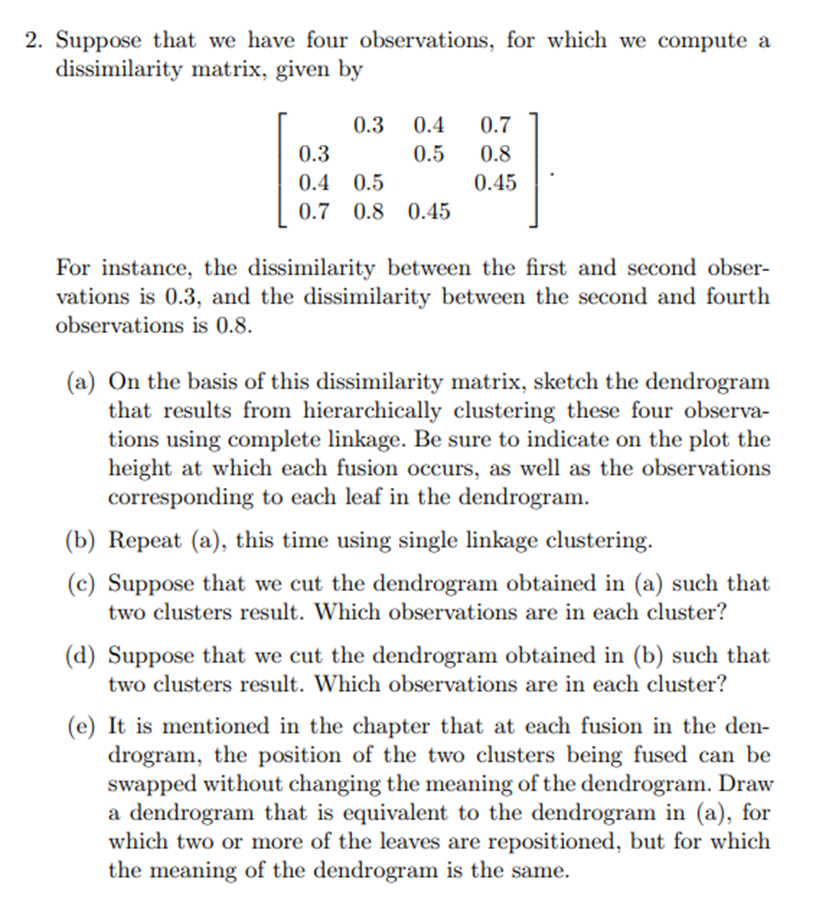

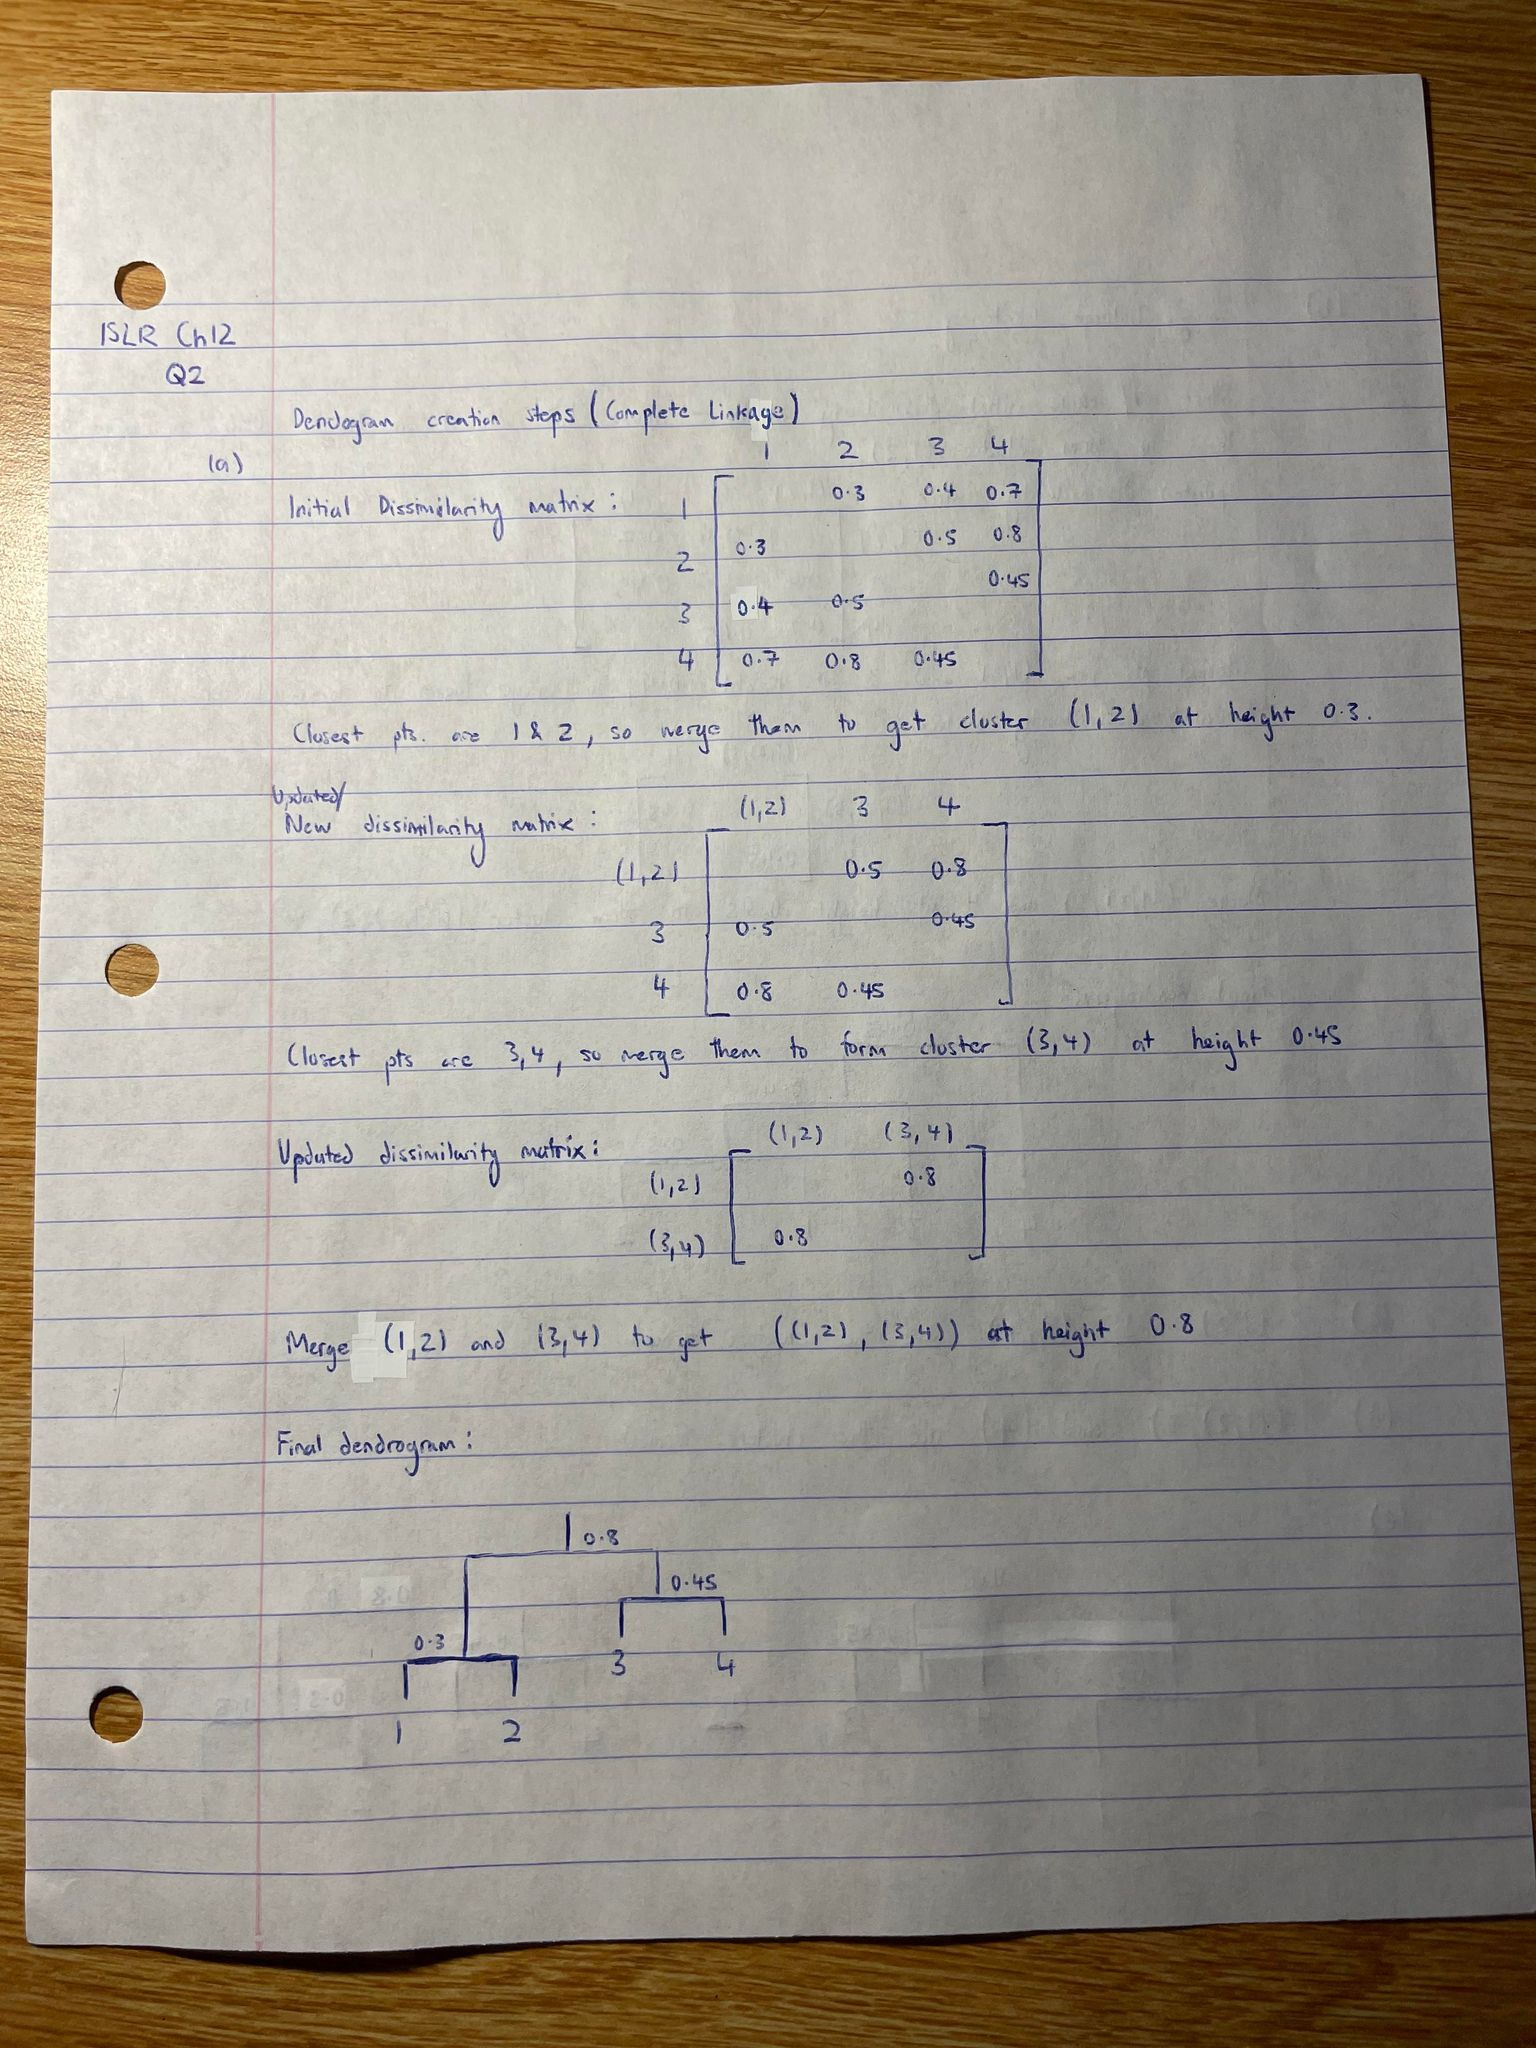  
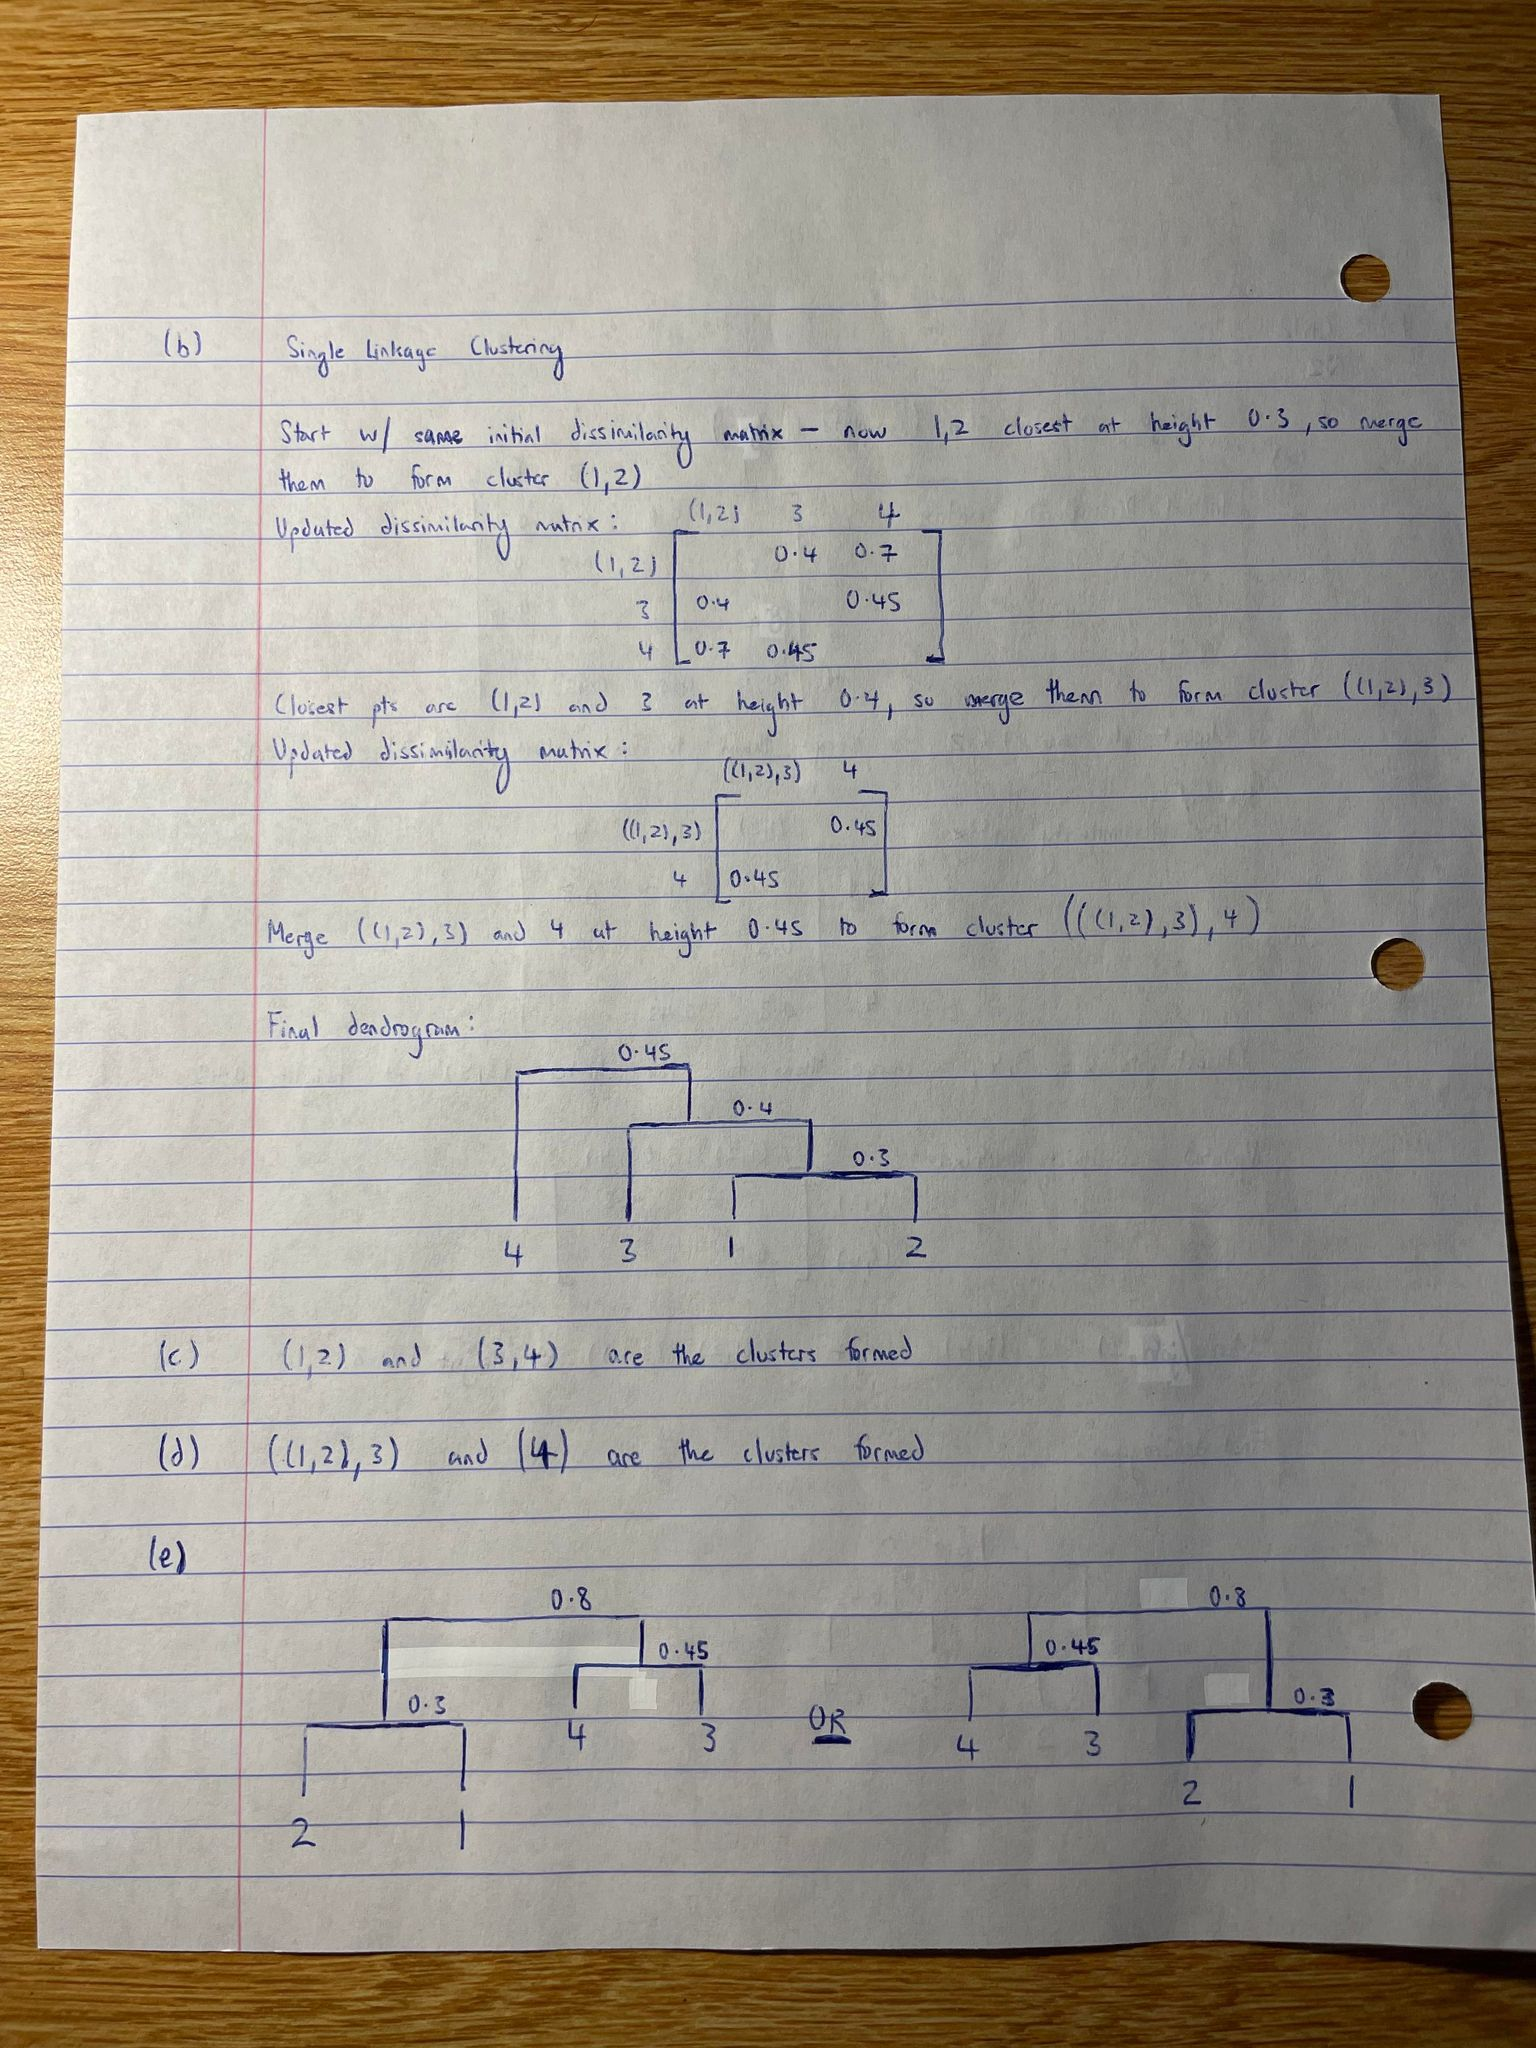